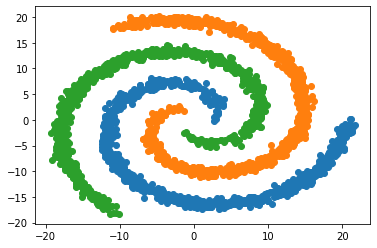

In [44]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

C = 3
N_each = 800
interval = 2
radius_slope = 3
width_scale = .5
radian = 2*pi
start_list = [0.]
for i in range(C-1):
    start_list.append(start_list[-1]+2*pi/C)
theta = np.sqrt(np.random.rand(N_each))*radian # np.linspace(0,2*pi,100)
radius = theta*radius_slope+interval

class_list = []
for i in range(C):
    data_i = np.zeros((N_each, 3), dtype=float)
    data_i[:, :-1] = np.array([np.cos(start_list[i]+theta)*radius, np.sin(start_list[i]+theta)*radius]).T+np.random.randn(N_each,2)*width_scale
    data_i[:, -1] = i
    class_list.append(data_i)

features_labels_np = np.vstack(class_list)

plt.clf()
for i in range(C):
    plt.scatter(features_labels_np[i*N_each:(i+1)*N_each, 0], features_labels_np[i*N_each:(i+1)*N_each, 1])
plt.show()

41820.0


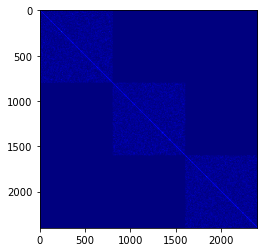

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [42]:
def calc_dist(X, Y):
    X_ = np.sum(X*X, axis=1, keepdims=True)
    Y_ = np.sum(Y*Y, axis=1, keepdims=True)
    dist_2 = X_+Y_.T-2*np.matmul(X, Y.T)
    dist_2[dist_2 < 0] = 0
    return np.sqrt(dist_2)

def plot_aff(aff, plt_name=None, save_path=None):
    aff = aff/np.max(aff)
    plt.imshow(aff, cmap='jet')
    if not(plt_name is None):
        plt.title(plt_name)
    plt.show()
    if not(save_path is None):
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0.02)
        plt.close()
        
def sym_normalized_adjacency(adj):
    row_sum = np.sum(adj, axis=-1, keepdims=True)
    D_inv_sqrt = np.power(row_sum, -0.5)
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0.
    return D_inv_sqrt*adj*D_inv_sqrt.T      

true_graph = np.zeros((features_labels_np.shape[0], features_labels_np.shape[0]), dtype=float)
pts = features_labels_np[:, :-1]
K = 15
E = calc_dist(pts, pts)
topK_ind = np.argpartition(E, kth=K, axis=1)[:, :K]
for i in range(features_labels_np.shape[0]):
    true_graph[i, topK_ind[i, :]] = (features_labels_np[topK_ind[i, :], -1] == features_labels_np[i, -1])
true_graph = np.maximum(true_graph, true_graph.T)
print(np.sum(true_graph))
# true_graph = sym_normalized_adjacency(true_graph)
plt.clf()
plot_aff(true_graph)
np.set_printoptions(threshold=1e5)
print(true_graph[:50, :50]) 

In [46]:
np.save('data/spiral.npy', features_labels_np)
np.save('data/spiral_adj.npy', true_graph)

In [50]:
tt = np.random.randn(5, 8)
print(tt)
tt[tt > 0][:] = 0
print(tt)

[[-0.2475736   0.12677914  1.18277812  1.23977059  0.72938868  0.19956269
  -0.03952449  4.29227278]
 [ 0.37995094 -0.76041846  2.37479335 -1.6891079  -1.35594223 -0.70513122
  -0.67490614  1.53285331]
 [-0.72189398  0.53270955  0.84317624 -1.86042759 -0.77138509  1.26664338
  -0.4312767  -0.59051968]
 [ 1.54616275  0.4389919  -0.61338931  0.497233    1.4236419  -0.57424021
  -0.72241724  0.06433615]
 [ 0.29554451  0.5805707  -0.50694066 -1.89908204  0.1270889  -1.227969
  -0.14638856  0.00819975]]
[[-0.2475736   0.12677914  1.18277812  1.23977059  0.72938868  0.19956269
  -0.03952449  4.29227278]
 [ 0.37995094 -0.76041846  2.37479335 -1.6891079  -1.35594223 -0.70513122
  -0.67490614  1.53285331]
 [-0.72189398  0.53270955  0.84317624 -1.86042759 -0.77138509  1.26664338
  -0.4312767  -0.59051968]
 [ 1.54616275  0.4389919  -0.61338931  0.497233    1.4236419  -0.57424021
  -0.72241724  0.06433615]
 [ 0.29554451  0.5805707  -0.50694066 -1.89908204  0.1270889  -1.227969
  -0.14638856  0.008